# Quadratic Regression

Minimizing a quadratic function to find a best fit line and estimate an output value.

In [19]:
import pandas as pd
import plotly.express as px
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from datascience import *

For the test a simulation of shooting a rock out of a slingshot is made. With angle shot as 'angle' and 'distance' as distance. The goal is to find a best fit line using quadratic regression. 

## Data Import and Visualization

In [20]:
#set values
angle = np.arange(0,75,5)
distance = (110,143,175,220,253,269,284,285,277,266,244,231,180,160,120)
#create dataframe
throw_angle = pd.DataFrame()
throw_angle['angle'] = angle
throw_angle['distance'] = distance
#show df
throw_angle

,angle,distance
0,0,110
1,5,143
2,10,175
3,15,220
4,20,253
5,25,269
6,30,284
7,35,285
8,40,277
9,45,266


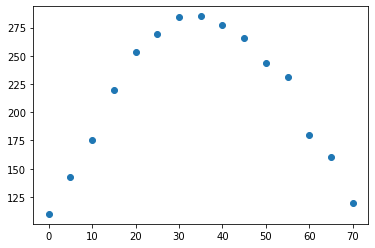

In [21]:
plots.scatter(throw_angle['angle'], throw_angle['distance']);
plots.show();

Finding correlation will be useless in this situation due to the data not being linear. It will usually come out to a small value.

In [22]:
#Finds correlation between two columns in a table.
def correlation(table, col_x, col_y):
    def standard_units(z):
        """Converts an array x to standard units"""
        return (z - np.mean(z)) / np.std(z)
    x_su = standard_units(table[col_x])
    y_su = standard_units(table[col_y])
    return np.mean(x_su * y_su)

correlation(throw_angle, 'angle','distance')

0.0523413268465139

Due to the fact that there is no linear correlation, a different regression method must be used. By looking at the visualization above, a quadratic function looks like it might fit.

The method to find the best fit line using a quadratic function will be to minimize the Root Mean Squared Error(RMSE).

In [23]:
#A funciton that returns the a, b, and c values of a quadratic function that best fits the given data.
#Takes a table, x column, and y column. The minimize function is used to find a, b, and c values
#that minimized the RMSE.
def quadratic_RMSE(table, x, y):
    xv = table[x].values
    yv = table[y].values
    def quad_function(a,b,c):
        quad_fit = a*(xv**2) + b*xv + c
        #Returns RMSE given a, b, and c.
        return np.sqrt(np.mean((yv-quad_fit)**2))
    #minimize finds the input values that will produce a minimum output value.
    #minimize function is from the datascience package.
    return minimize(quad_function)

In [24]:
abc = quadratic_RMSE(throw_angle, 'angle', 'distance')
print('a = ',(abc[0]), ', b = ', (abc[1]),', c = ', (abc[2]))

a =  -0.14163991544812038 , b =  10.058374621645454 , c =  102.03469567294106


In [25]:
print('Therefore, y =',round((abc[0]),3),'x^2 +',round((abc[1]), 3),'x +',round((abc[2]),3)) 

Therefore, y = -0.142 x^2 + 10.058 x + 102.035


Compute an estimated value for each row.

In [26]:
#Creates a table that adds the predicted values.
xval = throw_angle['angle']
throw_predict = throw_angle.copy()
throw_predict['predicted'] = round((abc[0]*xval**2 + abc[1]*xval +abc[2]))
throw_predict

,angle,distance,predicted
0,0,110,102.0
1,5,143,149.0
2,10,175,188.0
3,15,220,221.0
4,20,253,247.0
5,25,269,265.0
6,30,284,276.0
7,35,285,281.0
8,40,277,278.0
9,45,266,268.0


# Plot the best fit line on the data.

In [87]:
#Creates a simple graph that graphs the new predicted values on a scatter plot.
def scatter_fit(table, x, y):
    #Nest a function that returns an array that correlates to the a, b, and c values of a quadratic function.
    #This quadratic function minimizes the RMSE of a quadratic function given table, x, and y.
    #This will be used for a best fit line.
    def quad_minimize(table, x, y):
        xv = table[x].values
        yv = table[y].values
        #Determines a quadratic output given a, b, c.
        #Values xv and yv need to be defined also.
        def quadratic_define_and_rmse(a,b,c):
            quad_fit = a*(xv**2) + b*xv + c
            #Returns RMSE given a, b, and c.
            return np.sqrt(np.mean((yv-quad_fit)**2))
        #Minimize function determines the a, b, and c values that minimize RMSE
        abcminimized = minimize(quadratic_define_and_rmse)
        return abcminimized
    abc_quad = quad_minimize(table, x, y)
    xvalues = table[x]
    predicted_table = table.copy()
    #Compute the predicted value for every x and add it to the table.
    predicted_table['predicted'] = abc_quad[0]*xvalues**2 + abc_quad[1]*xvalues +abc_quad[2]
    #Compute the residuals between predicted values and acutal values and add them to the table.
    residual = table[y] - predicted_table['predicted']
    predicted_table['residual'] = residual
    #Prints the estimated regression line.
    print('Predicted y Value =',round((abc_quad[0]),3),'x^2 +',round((abc_quad[1]), 3),'x +',round((abc_quad[2]),3))
    #Finds and prints the RMSE of the regression.
    abc_rmse = np.sqrt(np.average((residual)**2))
    print('RMSE = ', np.round(abc_rmse,2))
    #Shows the predicted data as a line and scatters the actual points.
    plots.plot(table[x], predicted_table['predicted'])
    plots.scatter(predicted_table[x], predicted_table[y]);
    plots.title('Best Fit Line for Compared Data')
    plots.xlabel(x)
    plots.ylabel(y)
    plots.show();
    #Create a scatter plot that shows the residuals around the best fit line.
    #This is to visually look to see if there is a clustered pattern.
    #This is also to visually check to see how clustered the residuals are around the best fit.
    xlims = make_array(min(xvalues), max(xvalues))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4); 
    plots.scatter(predicted_table[x], predicted_table['residual']);
    plots.title('Residual Plot of Compared Data')
    plots.xlabel(x)
    plots.ylabel('residual')
    plots.show();

Predicted y Value = -0.142 x^2 + 10.058 x + 102.035
RMSE =  7.29


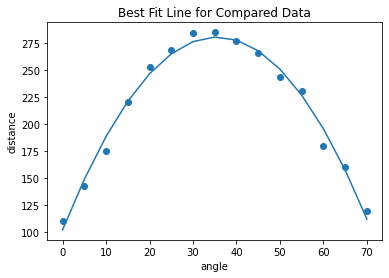

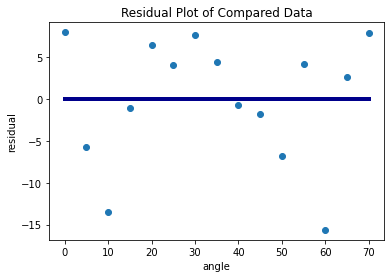

In [88]:
scatter_fit(throw_predict, 'angle', 'distance');